<a href="https://colab.research.google.com/github/mz-zarei/Trajectory_Analysis/blob/main/OpenDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
dataBase = sqlite3.connect("/content/drive/MyDrive/Trajectory_Analysis/trajectories_rdb2_v3.sqlite")

# Get all table names
table_names = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", dataBase)
# print(table_names)

# Add all tables into dataframe
df = pd.DataFrame()
for table in table_names.values:
    print('Adding table: ' + table[0])
    df_t = pd.read_sql_query("SELECT * FROM " + table[0], dataBase)
    df_t['table'] = table[0]
    df = pd.concat([df,df_t])



dataBase.close()


Adding table: rdb2_154
Adding table: rdb2_155
Adding table: rdb2_156
Adding table: rdb2_157
Adding table: rdb2_158
Adding table: rdb2_159
Adding table: rdb2_160
Adding table: rdb2_161
Adding table: rdb2_162
Adding table: rdb2_163
Adding table: rdb2_164
Adding table: rdb2_165
Adding table: rdb2_166
Adding table: rdb2_167
Adding table: rdb2_168
Adding table: rdb2_169
Adding table: rdb2_170
Adding table: rdb2_171
Adding table: rdb2_172
Adding table: rdb2_173
Adding table: rdb2_174
Adding table: rdb2_175
Adding table: rdb2_176
Adding table: rdb2_177
Adding table: rdb2_178
Adding table: rdb2_179
Adding table: rdb2_180
Adding table: rdb2_181
Adding table: rdb2_182
Adding table: rdb2_183
Adding table: rdb2_184
Adding table: rdb2_185
Adding table: rdb2_186
Adding table: rdb2_187
Adding table: rdb2_188
Adding table: rdb2_189
Adding table: rdb2_190


In [3]:
# Count number of unique object for each class
df[['OBJID', 'CLASS']].drop_duplicates(subset='OBJID').groupby('CLASS').count()

KeyError: ignored

# of vehicles with full stop:  1833
# of vehicles with full stop:  31040


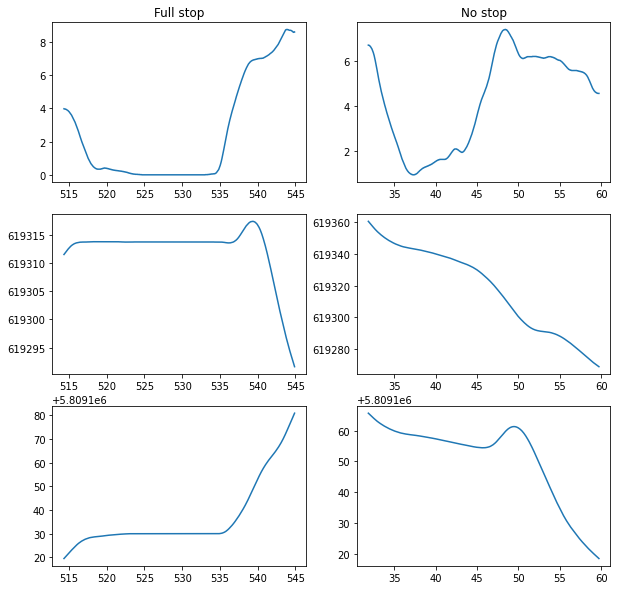

In [ ]:
import matplotlib.pyplot as plt 

# Vehicles ID with full stop (i.e. V = 0)
IDs_stop = set(df[(df.V == 0) & (df.CLASS == 'Car')]['OBJID'].unique())
print('# of vehicles with full stop: ', len(IDs_stop))

# Vehicles ID without full stop (i.e. V > 0.1)
IDs_nostop = set(df['OBJID'].unique()) - IDs_stop
print('# of vehicles with full stop: ', len(IDs_nostop))

# Plots for sample vehicle
veh_ID_stop = list(IDs_stop)[30]
veh_ID_nostop = list(IDs_nostop)[35]

speed_s = df[df.OBJID == veh_ID_stop].V
speed_ns = df[df.OBJID == veh_ID_nostop].V

time_s = df[df.OBJID == veh_ID_stop].TIMESTAMP
time_ns = df[df.OBJID == veh_ID_nostop].TIMESTAMP

X_s = df[df.OBJID == veh_ID_stop].UTM_X
X_ns = df[df.OBJID == veh_ID_nostop].UTM_X

Y_s = df[df.OBJID == veh_ID_stop].UTM_Y
Y_ns = df[df.OBJID == veh_ID_nostop].UTM_Y





fig, axes = plt.subplots(3,2, figsize = (10,10))
axes[0,0].plot(time_s, speed_s)
axes[1,0].plot(time_s, X_s)
axes[2,0].plot(time_s, Y_s)

axes[0,1].plot(time_ns, speed_ns)
axes[1,1].plot(time_ns, X_ns)
axes[2,1].plot(time_ns, Y_ns)

axes[0,0].set_title('Full stop')
axes[0,1].set_title('No stop')


plt.show()
